# 06 Example - Sparse Sweep

In [1]:
import pyscan as ps
import numpy as np
import matplotlib.pyplot as plt

Could not load Keysight SD1
Could not load Keysight SD1
pylablib not found, AttocubeANC350 not loaded
Basler Camera software not found, BaserCamera not loaded
Helios Camera not installed
msl not installed, Thorlabs BSC203 driver not loaded
seabreeze module not found, Ocean Optics not imported
Failed to load spinapi library.
spinapi is not installed, PulseBlaster driver not loaded.
Thorlabs Kinesis not found, ThorlabsBSC203 not loaded
Thorlabs Kinesis not found, ThorlabsBPC303 not loaded
Thorlabs Kinesis not found, ThorlabsMFF101 not loaded


## Setup devices

In [2]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()

## Define a measure function

In [10]:
def get_voltage_data(expt):
    """
    Reads the voltage from v1, v2 devices, and adds a calculated value vsum
    """
     
    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    d.v1 = devices.v1.voltage
    d.v2 = devices.v2.voltage

    d.vsum = d.v1 + d.v2    

    return d

## Define function to generate sparse points

In [5]:
from random import random, choices

def uniform_cartesian_points(runinfo, percent):
    ''' Create a mask (a 2D list) whose shape matches the dimensions of loop0 and loop1. 
    A value of 0 means the corresponding point will not be collected; 
    a value of 1 means that the point will be collected.

    The `percent` argument determines the percentage of total points that will be collected.
    '''
    sparse_points = np.zeros(runinfo.dims)
    n_points = np.prod(runinfo.dims)
    points = np.array(np.where(sparse_points==0)).T
    rand_points = choices(points, k=int(percent / 100 * n_points)) # k is number of random points to collect
    mask = tuple(map(tuple, np.array(rand_points).T))
    sparse_points[mask] = 1

    return sparse_points

## Experiments

### 1. 2D Scan using SparseSweep

In [8]:
# Setup runinfo with loop0 and loop1 as PropertyScan
runinfo = ps.RunInfo()

runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.02, 2)}, prop='voltage', dt=0.01)
runinfo.loop1 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 10)}, prop='voltage', dt=0.01)

runinfo.sparse_points = uniform_cartesian_points(runinfo, percent = 10)
runinfo.measure_function = generate_voltage_data

expt = ps.SparseSweep(runinfo, devices)

expt.start_thread()

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(101, 51)


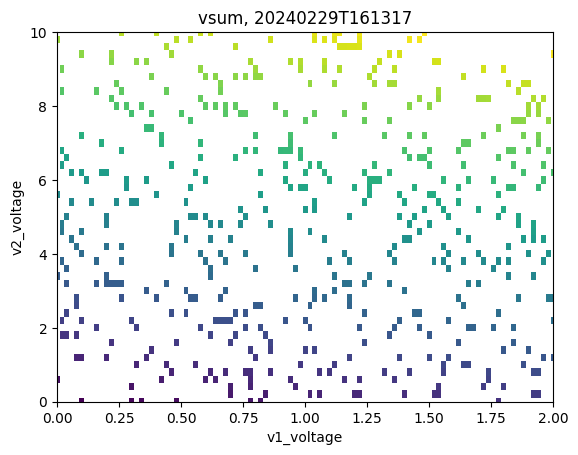

In [9]:
ps.live_plot2D(expt, data_name="vsum")